## This data was extracted from the census bureau database found at
http://www.census.gov/ftp/pub/DES/www/welcome.html
Donor: Ronny Kohavi and Barry Becker,
Data Mining and Visualization
Silicon Graphics.
e-mail: ronnyk@sgi.com for questions.
Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
48842 instances, mix of continuous and discrete (train=32561, test=16281)
45222 if instances with unknown values are removed (train=30162, test=15060)
Duplicate or conflicting instances : 6
Class probabilities for adult.all file
Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

Extraction was done by Barry Becker from the 1994 Census database. A set of
reasonably clean records was extracted using the following conditions:
((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) Prediction task is to
determine whether a person makes over 50K a year. Conversion of original data as
follows:
1. Discretized a gross income into two ranges with threshold 50,000.
2. Convert U.S. to US to avoid periods.
3. Convert Unknown to "?"
4. Run MLC++ GenCVFiles to generate data,test.
Description of fnlwgt (final weight)
The weights on the CPS files are controlled to independent estimates of the civilian
noninstitutional population of the US. These are prepared monthly for us by Population
Division here at the Census Bureau. We use 3 sets of controls.
These are:
1. A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6
times so that by the end we come back to all the controls we used.
The term estimate refers to population totals derived from CPS by creating "weighted
tallies" of any specified socio-economic characteristics of the population. People with
similar demographic characteristics should have similar weights. There is one important
caveat to remember about this statement. That is that since the CPS sample is actually a
collection of 51 state samples, each with its own probability of selection, the statement
only applies within state.

Dataset Link

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

Problem 1:
Prediction task is to determine whether a person makes over 50K a year.

Problem 2:
Which factors are important

Problem 3:
Which algorithms are best for this dataset

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.ensemble import ExtraTreesClassifier

import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
#import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics
import sklearn.tree as tree
import warnings
warnings.filterwarnings('ignore')

In [155]:
import os
##print(os.listdir("../input"))
dataset = pd.read_csv("adult.csv",na_values="?")

In [156]:
dataset.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [157]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [158]:
dataset['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [159]:
#convert '<=50k' to 0 and '>50k' to 1
def sal_cat(income):
    if income == '<=50K':
        return 0
    else:
        return 1
dataset['income']=dataset['income'].apply(sal_cat)

In [160]:
print("Work class categories \n")
print(dataset['workclass'].unique())

Work class categories 

[nan 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']


In [161]:
print("Education categories")
education_dataset = dataset[['education','education.num']]
education_dataset = education_dataset.drop_duplicates()

data = {'education': education_dataset['education'], 'education.num': education_dataset['education.num']}

education_dataset = pd.DataFrame(data=data)
education_dataset['education'].astype('category')
education_dataset.index = education_dataset['education.num']
print(education_dataset[['education']].sort_values('education.num'))

Education categories
                  education
education.num              
1                 Preschool
2                   1st-4th
3                   5th-6th
4                   7th-8th
5                       9th
6                      10th
7                      11th
8                      12th
9                   HS-grad
10             Some-college
11                Assoc-voc
12               Assoc-acdm
13                Bachelors
14                  Masters
15              Prof-school
16                Doctorate


In [162]:
print('marital status')
print(dataset['marital.status'].unique())
print(' \n occupation')
print(dataset['occupation'].unique())
print(' \n relationship')
print(dataset['relationship'].unique())
print(' \n race')
print(dataset['race'].unique())
print(' \n native.country')
print(dataset['native.country'].unique())

marital status
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
 
 occupation
[nan 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
 
 relationship
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
 
 race
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
 
 native.country
['United-States' nan 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong'
 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru' 'Nicaragua'
 'Dominican-Republic' 'Haiti' 'El-Salvador' 'Hungary' 'Columbia'
 'Guatemala' 'Jamaica' 'Ecuador' 'France' 'Yugoslavia' 'Scotland'
 'Portugal' 'Laos'

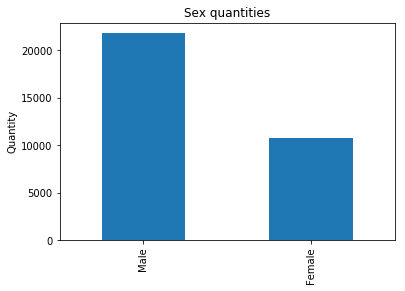

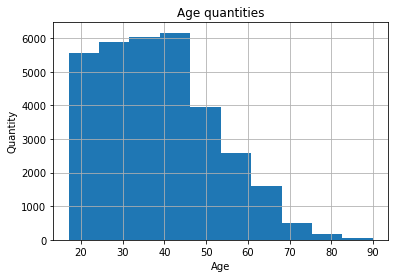

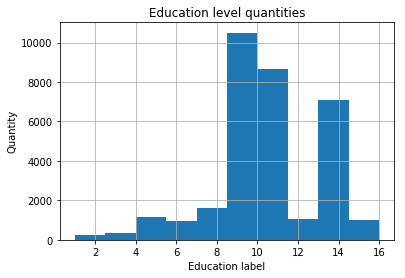

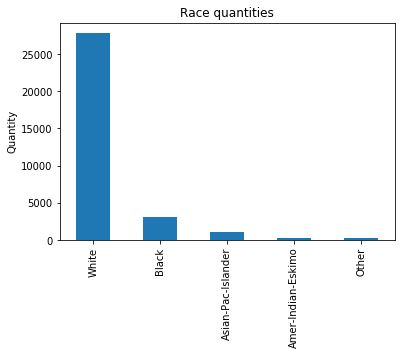

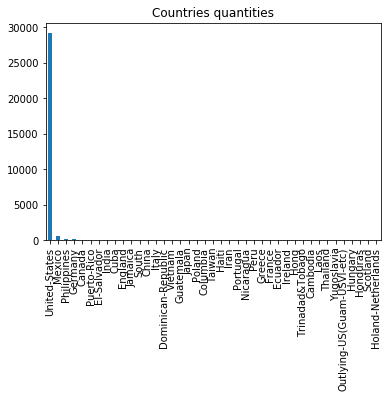

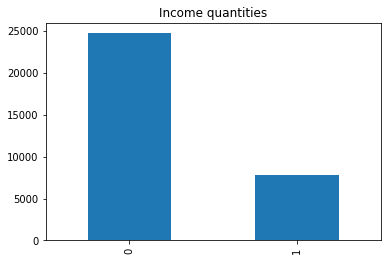

In [163]:
ax = dataset['sex'].value_counts().plot(kind="bar")
ax.set_ylabel("Quantity")
plt.title("Sex quantities")
plt.show()

ax = dataset['age'].hist()
ax.set_xlabel("Age")
ax.set_ylabel("Quantity")
plt.title("Age quantities")
plt.show()

ax = dataset['education.num'].hist()
ax.set_xlabel("Education label")
ax.set_ylabel("Quantity")
plt.title("Education level quantities")
plt.show()

ax = dataset['race'].value_counts().plot(kind="bar")
ax.set_ylabel("Quantity")
plt.title("Race quantities")
plt.show()

dataset['native.country'].value_counts().plot(kind="bar")
ax.set_ylabel("Quantity")
plt.title("Countries quantities")
plt.show()

dataset['income'].value_counts().plot(kind="bar")
ax.set_ylabel("Quantity")
plt.title("Income quantities")
plt.show()


In [164]:
# Change the non numerical values to categorical values for prediction

for attrb in dataset.columns:
    if dataset[attrb].dtype=='object':
        dataset[attrb]=pd.Categorical(dataset[attrb]).codes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null int8
fnlwgt            32561 non-null int64
education         32561 non-null int8
education.num     32561 non-null int64
marital.status    32561 non-null int8
occupation        32561 non-null int8
relationship      32561 non-null int8
race              32561 non-null int8
sex               32561 non-null int8
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null int8
income            32561 non-null int64
dtypes: int64(7), int8(8)
memory usage: 2.0 MB


In [165]:
dataset.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,-1,77053,11,9,6,-1,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,-1,186061,15,10,6,-1,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


In [166]:
#Preparing the features and target
features = dataset.drop("income", axis=1)
target = dataset.income

#encoding the category features
features_to_encode = features[['workclass', 'education', 'marital.status',
       'occupation', 'relationship', 'race', 'sex',
       'native.country']]

features_encoded = features_to_encode.apply(preprocessing.LabelEncoder().fit_transform)
target = preprocessing.LabelEncoder().fit_transform(target)
features[['workclass', 'education', 'marital.status',
       'occupation', 'relationship', 'race', 'sex',
       'native.country']] = features_encoded

print(features.shape, target.shape)

display(features.head(5))

(32561, 14) (32561,)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39


In [167]:
#Dividing train and test data
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.3)

In [168]:
#Analising the % importance level in each feature
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(features, target)
importances = forest.feature_importances_
feature_importances = pd.DataFrame(importances*100,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
display(feature_importances)

,importance
fnlwgt,16.467054
age,15.196793
hours.per.week,9.426610
capital.gain,9.105421
relationship,8.925826
education.num,8.828362
marital.status,7.644848
occupation,7.502631
workclass,4.427328
education,3.610994


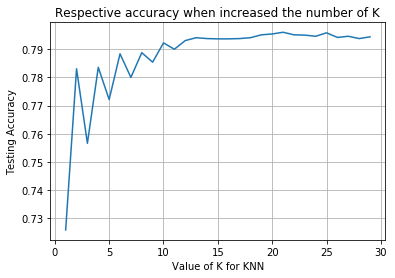

In [169]:
#Analisng the accuracy by increasing the number of K
scores = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

sns.lineplot(range(1,30), scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title("Respective accuracy when increased the number of K")
plt.grid(True)
plt.show()

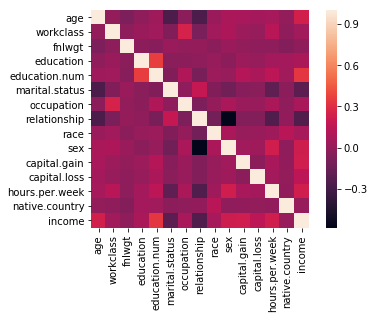

In [170]:
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(dataset)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

In [171]:
import math

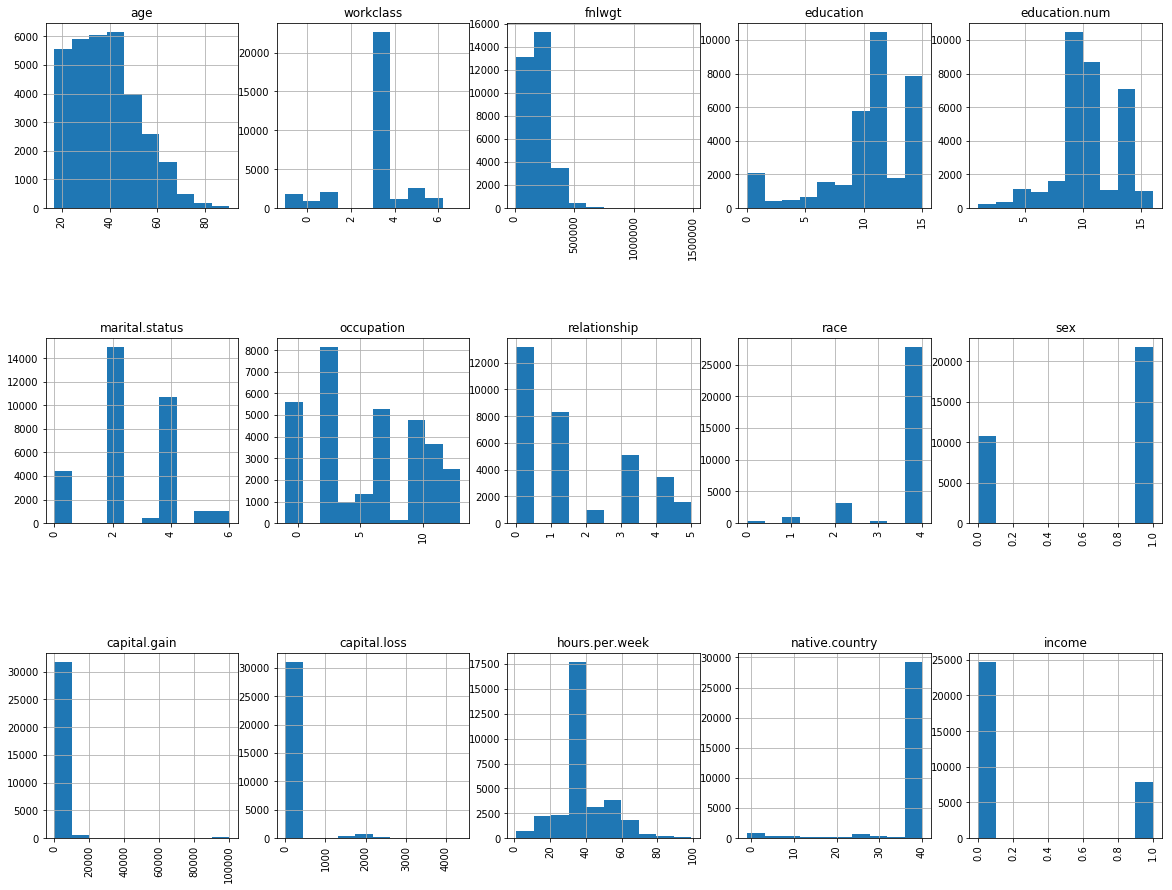

In [172]:
#Analyze the data
fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(dataset.shape[1]) / cols)
for i, column in enumerate(dataset.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if dataset.dtypes[column] == np.object:
        dataset[column].value_counts().plot(kind="bar", axes=ax)
    else:
        dataset[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

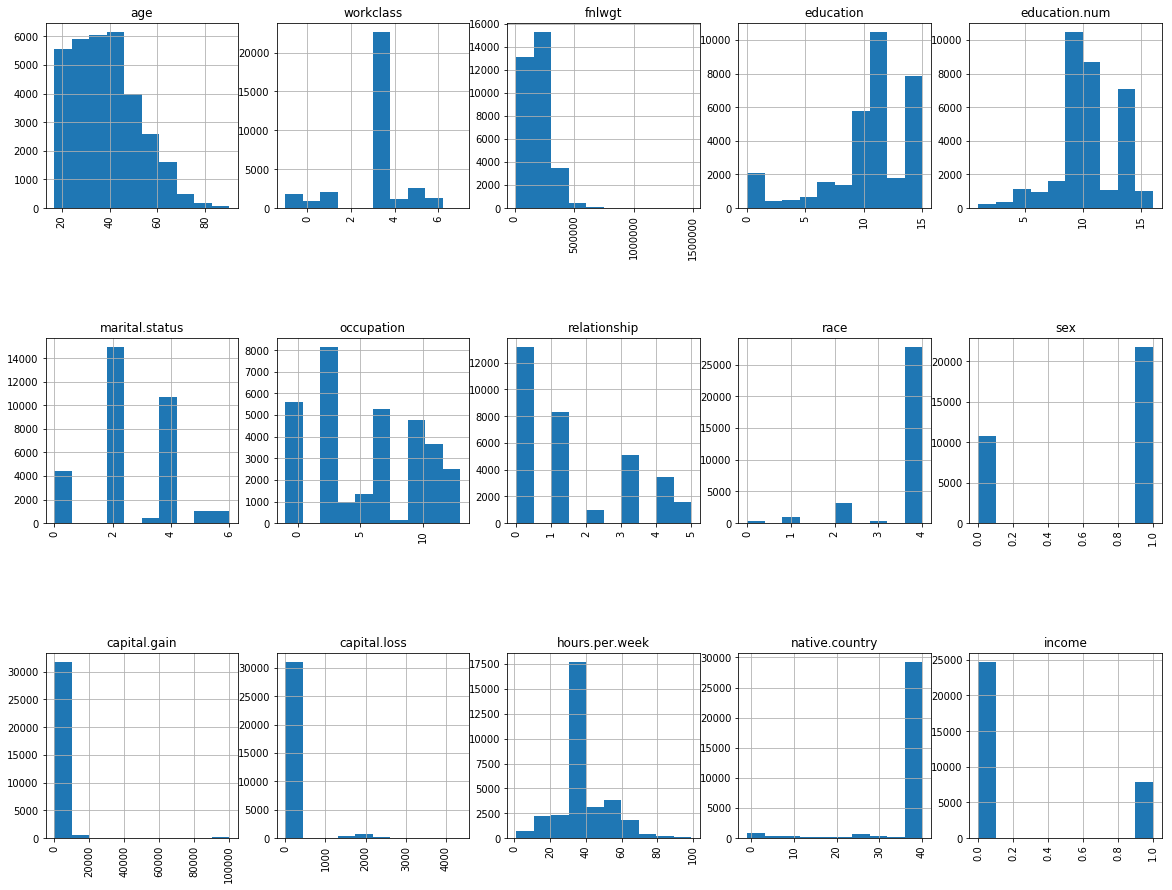

In [173]:
#Build a classifier

encoded_data, encoders = number_encode_features(dataset)
fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(encoded_data.shape[1]) / cols)
for i, column in enumerate(encoded_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_data[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [174]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null int8
fnlwgt            32561 non-null int64
education         32561 non-null int8
education.num     32561 non-null int64
marital.status    32561 non-null int8
occupation        32561 non-null int8
relationship      32561 non-null int8
race              32561 non-null int8
sex               32561 non-null int8
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null int8
income            32561 non-null int64
dtypes: int64(7), int8(8)
memory usage: 2.0 MB


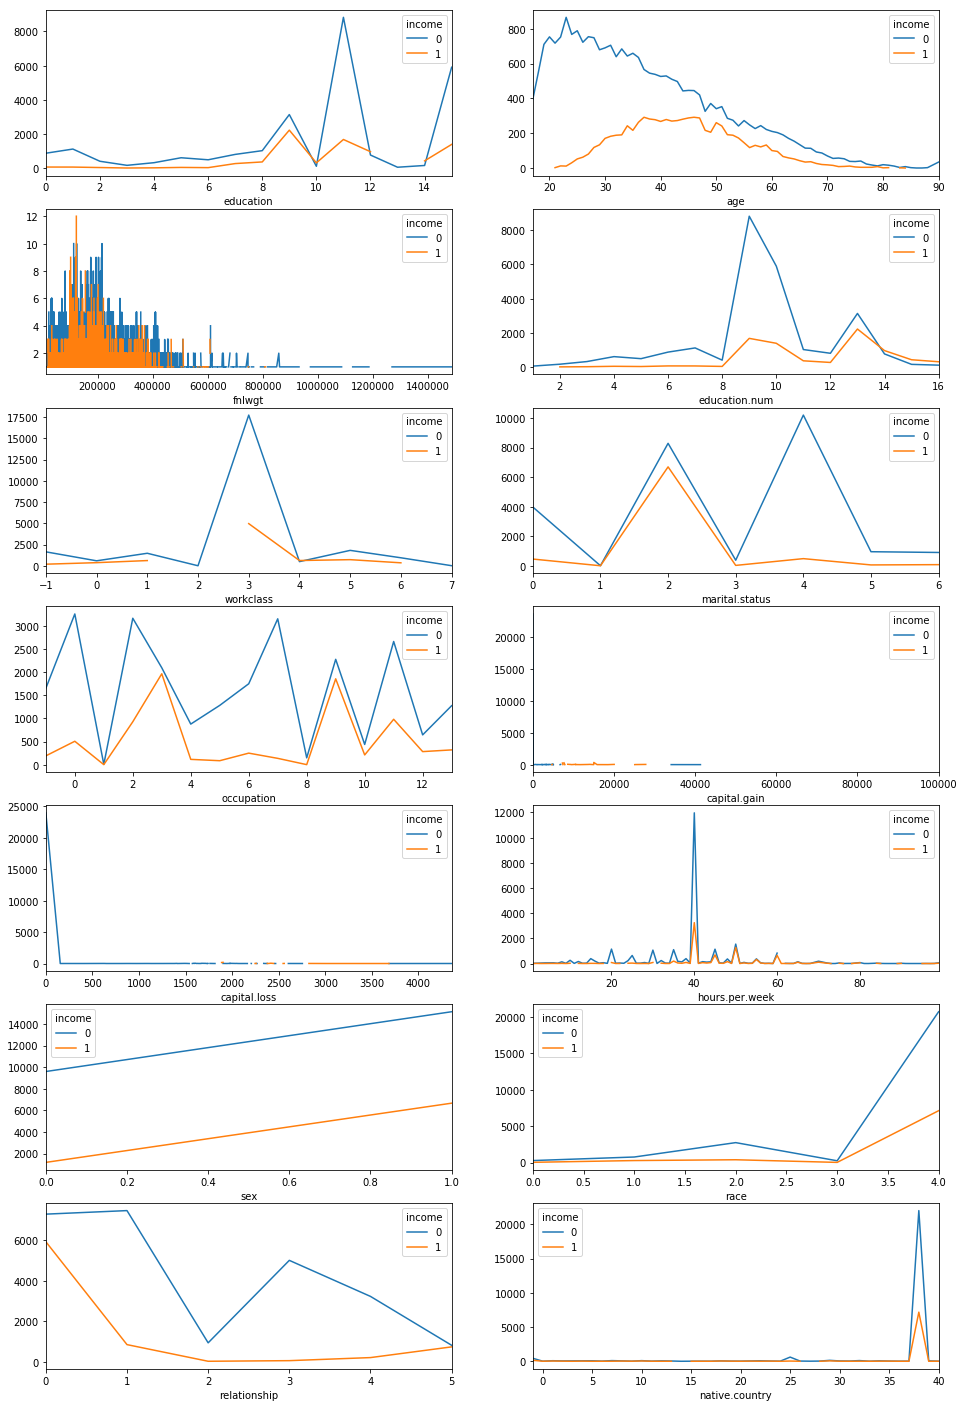

In [175]:
# Plots to see the relationship of the different parameters to the income.

fig, ax = plt.subplots(7,2,sharey=False)
edugrp=dataset.groupby(['education'])['income'].value_counts()
agegrp=dataset.groupby(['age'])['income'].value_counts()
fnlwgtgrp=dataset.groupby(['fnlwgt'])['income'].value_counts()
edunumgrp=dataset.groupby(['education.num'])['income'].value_counts()
workclsgrp=dataset.groupby(['workclass'])['income'].value_counts()
marstatgrp=dataset.groupby(['marital.status'])['income'].value_counts()
occugrp=dataset.groupby(['occupation'])['income'].value_counts()
capgaingrp=dataset.groupby(['capital.gain'])['income'].value_counts()
caplossgrp=dataset.groupby(['capital.loss'])['income'].value_counts()
hrperwkgrp=dataset.groupby(['hours.per.week'])['income'].value_counts()
gendergrp=dataset.groupby(['sex'])['income'].value_counts()
racegrp=dataset.groupby(['race'])['income'].value_counts()
reltngrp=dataset.groupby(['relationship'])['income'].value_counts()
cntrygrp=dataset.groupby(['native.country'])['income'].value_counts()

edugrp.unstack().plot(ax=ax[0][0],figsize=(16,25))
agegrp.unstack().plot(ax=ax[0][1])
fnlwgtgrp.unstack().plot(ax=ax[1][0])
edunumgrp.unstack().plot(ax=ax[1][1])
workclsgrp.unstack().plot(ax=ax[2][0])
marstatgrp.unstack().plot(ax=ax[2][1])
occugrp.unstack().plot(ax=ax[3][0])
capgaingrp.unstack().plot(ax=ax[3][1])
caplossgrp.unstack().plot(ax=ax[4][0])
hrperwkgrp.unstack().plot(ax=ax[4][1])
gendergrp.unstack().plot(ax=ax[5][0])
racegrp.unstack().plot(ax=ax[5][1])
reltngrp.unstack().plot(ax=ax[6][0])
cntrygrp.unstack().plot(ax=ax[6][1])

In [212]:
del dataset["education"]

In [213]:
# Remove the fields that are not important from the dataframe for predictions

dataset.drop(['fnlwgt','workclass','native.country'],axis=1,inplace=True)

In [176]:
from sklearn.model_selection import train_test_split

In [214]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
age               32561 non-null int64
education.num     32561 non-null int64
marital.status    32561 non-null int8
occupation        32561 non-null int8
relationship      32561 non-null int8
race              32561 non-null int8
sex               32561 non-null int8
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
income            32561 non-null int64
dtypes: int64(6), int8(5)
memory usage: 1.6 MB


In [220]:
#count no. of null data 
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

In [219]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22792 entries, 30769 to 15907
Data columns (total 14 columns):
age               22792 non-null int64
workclass         22792 non-null int64
fnlwgt            22792 non-null int64
education         22792 non-null int64
education.num     22792 non-null int64
marital.status    22792 non-null int64
occupation        22792 non-null int64
relationship      22792 non-null int64
race              22792 non-null int64
sex               22792 non-null int64
capital.gain      22792 non-null int64
capital.loss      22792 non-null int64
hours.per.week    22792 non-null int64
native.country    22792 non-null int64
dtypes: int64(14)
memory usage: 2.6 MB


In [225]:
#convert null data to string for encoding
#X_train[x_data.workclass.isnull()]
#X_train["workclass"].fillna("", inplace = True) 
X_train["occupation"].fillna("", inplace = True)
#X_train["native.country"].fillna("", inplace = True)

In [226]:
#encode categorical column using .cat.codes
#x_data["workclass"]=x_data["workclass"].astype("category").cat.codes
X_train["occupation"]=X_train["occupation"].astype("category").cat.codes
#x_data["native.country"]=x_data["native.country"].astype("category").cat.codes
#x_data["education"]=x_data["education"].astype("category").cat.codes
X_train["marital.status"]=X_train["marital.status"].astype("category").cat.codes
X_train["relationship"]=X_train["relationship"].astype("category").cat.codes
X_train["race"]=X_train["race"].astype("category").cat.codes
X_train["sex"]=X_train["sex"].astype("category").cat.codes


In [227]:
#Note:missing data is now assigned with 0 after encoding
#apply mean on columns with missing data
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=0, strategy='mean', axis=0)
#x_data['workclass']=imp.fit_transform(x_data[['workclass']])
X_train['occupation']=imp.fit_transform(X_train[['occupation']])
#x_data['native.country']=imp.fit_transform(x_data[['native.country']])

In [228]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(xtrain)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [136]:
xtrain=pd.DataFrame(data=scaler.transform(xtrain),
                   columns=xtrain.columns,
                   index=xtrain.index)

In [137]:
xtest=pd.DataFrame(data=scaler.transform(xtest),
                  columns=xtest.columns,
                  index=xtest.index)

In [229]:
#Logistic regression
#cls = linear_model.LogisticRegression()

#cls.fit(X_train, y_train)
#y_pred = cls.predict(X_test)
#cm = metrics.confusion_matrix(y_test, y_pred)
cls = linear_model.LogisticRegression()
cls.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [185]:
# Use the model to predict for the test dataset

logpredict = cls.predict(X_test)
logpredict

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [186]:
# Accuracy of the model

print('Accuracy of the Logistic Regression model : ', metrics.accuracy_score(y_test, logpredict))

Accuracy of the Logistic Regression model :  0.7978298699969291


In [187]:
# Print the confusion matrix and the classification report for the model
print(metrics.confusion_matrix(y_test, logpredict))
print(metrics.classification_report(y_test, logpredict))

[[7128  238]
 [1737  666]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7366
           1       0.74      0.28      0.40      2403

   micro avg       0.80      0.80      0.80      9769
   macro avg       0.77      0.62      0.64      9769
weighted avg       0.79      0.80      0.76      9769



In [230]:
# Evaluate the model using 10-fold cross-validation
from sklearn.model_selection import cross_val_score
logscores = cross_val_score(linear_model.LogisticRegression(), X_train, y_train, scoring='accuracy', cv=10)
logscores, logscores.mean()

(array([0.79342105, 0.78903509, 0.79912281, 0.78201754, 0.79420799,
        0.79947345, 0.79947345, 0.80912681, 0.78841089, 0.80772608]),
 0.7962015155976754)

In [192]:
# Algorithm 2 - Decision Tree
# Train the decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [193]:
# Use the model to make predictions with the test data
    
dtpred = dtree.predict(X_test)

In [194]:
# Check the performance of the model
count_misclassified = (y_test != dtpred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
dtaccuracy = metrics.accuracy_score(y_test, dtpred)
print('Accuracy of the Decision Tree model : ', dtaccuracy)

Misclassified samples: 1474
Accuracy of the Decision Tree model :  0.8491145460128979


In [195]:
# Print the confusion matrix and the classification report for the model
print(metrics.confusion_matrix(y_test, dtpred))
print(metrics.classification_report(y_test, dtpred))

[[6989  377]
 [1097 1306]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7366
           1       0.78      0.54      0.64      2403

   micro avg       0.85      0.85      0.85      9769
   macro avg       0.82      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769



In [196]:
# Evaluate the model using 10-fold cross-validation

dtscores = cross_val_score(DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0), 
                           X_train, y_train, scoring='accuracy', cv=10)
dtscores, dtscores.mean()

(array([0.84692982, 0.85175439, 0.85131579, 0.85350877, 0.85958754,
        0.84817903, 0.85212813, 0.85476086, 0.85118525, 0.84986831]),
 0.8519217878360605)

In [198]:
# Algorithm 3 - RandomForest Classifier
# Create Randomforest classifier model
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators=100)
rfmodel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [199]:
rfpred = rfmodel.predict(X_test)

rfaccuracy_score = metrics.accuracy_score(y_test,rfpred)
print('Accuracy of the Random Forest Classification model : ', rfaccuracy_score)

Accuracy of the Random Forest Classification model :  0.858941549800389


In [200]:
# Print the confusion matrix and the classification report for the model
print(metrics.confusion_matrix(y_test, rfpred))
print(metrics.classification_report(y_test, rfpred))

[[6887  479]
 [ 899 1504]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7366
           1       0.76      0.63      0.69      2403

   micro avg       0.86      0.86      0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.85      0.86      0.85      9769



In [202]:
# Evaluate the model using 10-fold cross-validation

rfscores = cross_val_score(RandomForestClassifier(n_estimators=100), X_train, y_train, scoring='accuracy', cv=10)
rfscores, rfscores.mean()

(array([0.84912281, 0.85614035, 0.85964912, 0.85350877, 0.85827117,
        0.8569548 , 0.86309785, 0.87187363, 0.85996488, 0.85338016]),
 0.8581963547164053)

In [203]:
rfmodel.feature_importances_

array([0.14848973, 0.04076527, 0.16786388, 0.03400024, 0.08924676,
       0.07433929, 0.06825949, 0.09790633, 0.01338229, 0.01406079,
       0.11555554, 0.03608453, 0.08279642, 0.01724944])

In [204]:
#Algorithm 4 - XGBoost Classifier
# Set the parameters for the XGBoost. 

params = {
    'objective':'binary:logistic',
    'max_depth':10,
    'silent':1,
    'n_estimators': 5
}

In [205]:
#Instantiating a XGBoost classifier, and fit with train_features and train_labels
from xgboost.sklearn import XGBClassifier
xgbst = XGBClassifier(**params).fit(X_train, y_train)

#Predicting the wage_class using test_features
xgpred = xgbst.predict(X_test)

In [206]:
accuracy_score_xgbst = metrics.accuracy_score(y_test,xgpred)
print('Accuracy of the XGBoost model : ', accuracy_score_xgbst)

Accuracy of the XGBoost model :  0.8546422356433616


In [207]:
# Print the confusion matrix and the classification report for the model
print(metrics.confusion_matrix(y_test, xgpred))
print(metrics.classification_report(y_test, xgpred))

[[7007  359]
 [1061 1342]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7366
           1       0.79      0.56      0.65      2403

   micro avg       0.85      0.85      0.85      9769
   macro avg       0.83      0.75      0.78      9769
weighted avg       0.85      0.85      0.85      9769



In [208]:
# Evaluate the model using 10-fold cross-validation

xgscores = cross_val_score(XGBClassifier(**params), X_train, y_train, scoring='accuracy', cv=10)
xgscores, xgscores.mean()

(array([0.84868421, 0.85570175, 0.85263158, 0.86096491, 0.85958754,
        0.85432207, 0.86178148, 0.86002633, 0.84899034, 0.84635645]),
 0.8549046671495961)

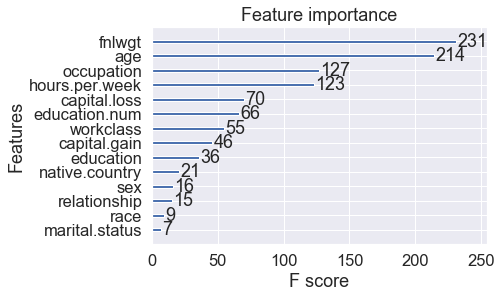

In [210]:
# Find the importance of the different attributes on the salaryclass. 
import xgboost as xgb
sns.set(font_scale = 1.5)
xgb.plot_importance(xgbst)